# Find poles: single channel

In [1]:
using Plots

In [8]:
function amp(s)
    m = 2.5;
    g = 1.1;
    K = g^2/(m^2 - s)
    ρ = sqrt(1.-1./s);
    #
    K/(1-1.0im*ρ*K)
end

amp (generic function with 1 method)

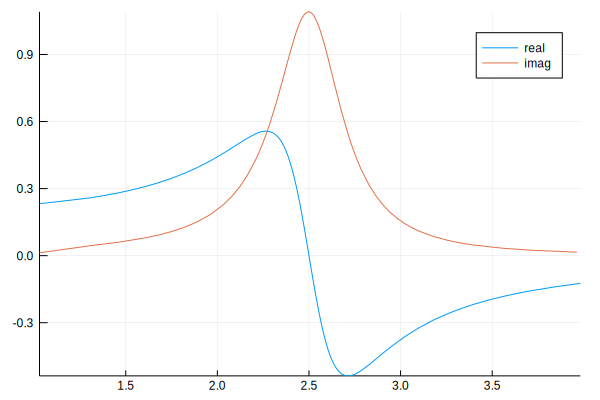

In [9]:
plot(e->real(amp(e^2)), 1, 4, lab="real")
plot!(e->imag(amp(e^2)), 1, 4, lab="imag")

### Plot the second sheet
Actually, in this case everything is at the first sheet

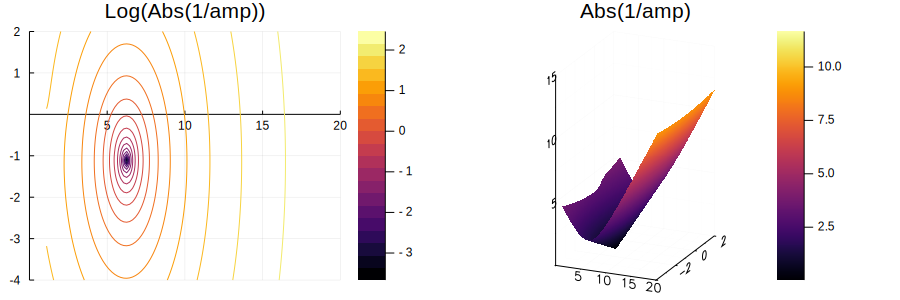

In [34]:
let sxv = linspace(1.1, 20,100), syv = linspace(-4.0,2, 100)
    cal = [amp(sx+1im*sy) for sy in syv, sx in sxv]
    plot(size=(900,300),
        contour(sxv, syv, [log(abs(1/v)) for v in cal], levels=20, framestyle=:origin, title="Log(Abs(1/amp))"),
        surface(sxv, syv, [abs(1/v) for v in cal], levels=20, framestyle=:origin, title="Abs(1/amp)")
        )
end